In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("train.csv",index_col="id")
test_data = pd.read_csv("test.csv",index_col="id")
train_data["source"] = "train"
test_data["source"] = "test"

In [3]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
id,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,train
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,train
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,train
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,train
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,train


In [4]:
train_data.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
source                  0
dtype: int64

In [5]:
sample = pd.read_csv("sample_submission.csv")
sample.head(5)

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [6]:
df = pd.concat([train_data,test_data])

In [7]:
df.isna().sum()

Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
source                       0
dtype: int64

In [8]:
df["Gender"] = np.where(df["Gender"]=="Male",0,1)

In [9]:
df.describe

<bound method NDFrame.describe of         Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                      
1            0   44                1         28.0                   0   
2            0   76                1          3.0                   0   
3            0   47                1         28.0                   0   
4            0   21                1         11.0                   1   
5            1   29                1         41.0                   1   
...        ...  ...              ...          ...                 ...   
508142       1   26                1         37.0                   1   
508143       1   38                1         28.0                   0   
508144       0   21                1         46.0                   1   
508145       0   71                1         28.0                   1   
508146       0   41                1         29.0                   1   

       Vehicle_A

In [10]:
df.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
id,,,,,,,,,,,,
1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
3,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
4,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
5,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train


In [11]:
df["Vehicle_Damage"] = np.where(df["Vehicle_Damage"]=="Yes",1,0)

In [12]:
df.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
id,,,,,,,,,,,,
1,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1.0,train
2,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0.0,train
3,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1.0,train
4,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0.0,train
5,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0.0,train


In [13]:
df["Vehicle_Age"].value_counts()

1-2 Year     267015
< 1 Year     219805
> 2 Years     21326
Name: Vehicle_Age, dtype: int64

In [13]:
df["Vehicle_Age"] = df["Vehicle_Age"].replace('1-2 Year',1)
df["Vehicle_Age"] = df["Vehicle_Age"].replace('< 1 Year',0)
df["Vehicle_Age"] = df["Vehicle_Age"].replace('> 2 Years',2)

In [14]:
df.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
id,,,,,,,,,,,,
1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1.0,train
2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0.0,train
3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1.0,train
4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0.0,train
5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0.0,train


In [15]:
train = df[df["source"]=="train"]
test  = df[df["source"]=="test"]
del train["source"]
del test["source"]

In [16]:
train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [17]:
test.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [18]:
train_X = train.drop(columns='Response')
train_Y = train["Response"]
test_X = test.drop(columns='Response')
test_Y = test["Response"]

In [19]:
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
   
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred1 = pred_test
    sample["Response"] = pred_test.astype(int)
    test_y = pred_test
    sample.to_csv(filename, index = False)

In [20]:
model = LogisticRegression(class_weight='balanced')
run_model(model, train_X, train_Y, test_X, sample, "test_result_Logist_regression_df.csv" )


In [21]:
def metric_res(acctual, pred):
    print("confusion_matrix ", confusion_matrix(acctual, pred))
    print("accuracy_score ", accuracy_score(acctual, pred))
    print("recall_score", recall_score(acctual, pred))
    print("precision_score ", precision_score(acctual, pred))
    print("f1_score", f1_score(acctual, pred))
    print("roc_auc_score", roc_auc_score(acctual, pred))
    print("classification report \n", classification_report(acctual, pred))

In [22]:
model = LogisticRegression(class_weight='balanced')
model.fit(train_X, train_Y)
pred_train = model.predict(train_X)
metric_res(train_Y,pred_train)

confusion_matrix  [[202115 132284]
 [ 19490  27220]]
accuracy_score  0.6017569776625585
recall_score 0.5827445943052879
precision_score  0.17065402748520414
f1_score 0.26399759473168655
roc_auc_score 0.5935786434634882
classification report 
               precision    recall  f1-score   support

         0.0       0.91      0.60      0.73    334399
         1.0       0.17      0.58      0.26     46710

    accuracy                           0.60    381109
   macro avg       0.54      0.59      0.50    381109
weighted avg       0.82      0.60      0.67    381109



In [23]:
def create_poly(train,test, degree):
    poly = PolynomialFeatures(degree = degree)
    train_poly = poly.fit_transform(train)
    test_poly = poly.fit_transform(test)
    return train_poly, test_poly

In [24]:
#pd.Series(model.feature_importances_, index=train_X.columns).sort_values(ascending=False)

In [25]:
model = LogisticRegression(class_weight='balanced')
train_poly,test_poly = create_poly(train_X,test_X,2)
run_model(model, train_poly, train_Y, test_poly, sample, "poly_logistic_Insurance.csv" )

In [26]:
def KNN_predicts(train_X, train_y, test_X, scaler, neighbours, metric ='manhattan', weights = 'uniform'):
    train_scaled = scaler.fit_transform(train_X)
    test_scaled = scaler.transform(test_X)
    KNN = KNeighborsClassifier(n_neighbors =neighbours,metric = metric,weights = weights,n_jobs= 4)
    KNN.fit(train_scaled,train_y)
    predictions = KNN.predict(test_scaled)
        
    return predictions

In [27]:
pred = KNN_predicts(train_X, train_Y, test_X,StandardScaler(), 5,metric ='chebyshev',weights = 'distance')
sample["Response"] = pred.astype(int)
sample.to_csv("KNN_Insurance.csv", index = False)

In [31]:
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["Response"] = pred_test.astype(int)
    sample.to_csv(filename, index = False)
    return np.mean(np.abs(score))

In [32]:
model = RandomForestClassifier()
run_model(model, train_X, train_Y, test_X, sample, "Insurance_RandomForest_Class.csv")

RMSE of Train Data =  0.01254732140429992
Cross validation Score  =  0.36608659005507344


0.36608659005507344

In [33]:
parameters = {'n_estimators':(100,150,200,225,250, 275, 300, 325, 350) }
model = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(model, parameters, verbose = 2)
#clf = RandomizedSearchCV(model, parameters, verbose = 1, cv=10)
clf.fit(train_X, train_Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. n_estimators=100, total=  27.4s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.3s remaining:    0.0s


[CV] ................................. n_estimators=100, total=  25.6s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  25.6s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  25.5s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  25.9s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=  37.9s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=  39.5s
[CV] n_estimators=150 ................................................
[CV] ................................. n_estimators=150, total=  38.4s
[CV] n_estimators=150 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 47.0min finished


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'n_estimators': (100, 150, 200, 225, 250, 275, 300,
                                          325, 350)},
             verbose=2)

In [34]:
clf.best_estimator_

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [37]:
model.fit(train_X, train_Y)
pd.Series(model.feature_importances_, index=train_X.columns).sort_values(ascending=False)

Vintage                 0.282881
Annual_Premium          0.254243
Age                     0.135025
Region_Code             0.108112
Vehicle_Damage          0.081229
Policy_Sales_Channel    0.061537
Previously_Insured      0.044511
Vehicle_Age             0.019466
Gender                  0.012482
Driving_License         0.000515
dtype: float64

In [38]:
model = RandomForestClassifier(n_estimators=200, n_jobs=-1)
run_model(model, train_X, train_Y, test_X, sample, "test_result_RandomForest_GridSearch.csv")

RMSE of Train Data =  0.011792702223839225
Cross validation Score  =  0.36491372860025806


0.36491372860025806

In [39]:
scaler = MinMaxScaler()

scaler.fit(train_X)
train_x = scaler.transform(train_X)
scaler.fit(test_X)
test_x = scaler.transform(test_X)

In [40]:
modlel = XGBClassifier()
run_model(model, train_x, train_Y, test_x, sample, "test_result_XGB.csv")

RMSE of Train Data =  0.011792702223839225
Cross validation Score  =  0.36547374932977816


0.36547374932977816

In [41]:
#model = SVC(kernel='rbf')
#run_model(model, train_x, train_Y, test_x, sample, "test_result_svC.csv")

In [34]:
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', RandomForestClassifier(n_estimators=200, n_jobs=-1)))
    level0.append(('bayes', GaussianNB()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
 


In [35]:

def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = RandomForestClassifier(n_estimators=200, n_jobs=-1)
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

In [36]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y,scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.876 (0.002)
>knn 0.859 (0.001)
>cart 0.823 (0.002)
>svm 0.867 (0.001)
>bayes 0.820 (0.002)
>stacking 0.871 (0.002)


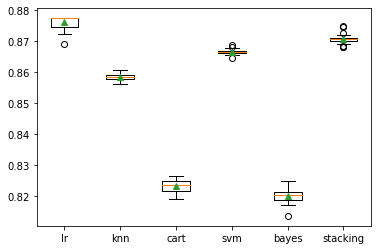

In [37]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, train_X, train_Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [39]:
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('rf', RandomForestClassifier(n_estimators=200, n_jobs=-1)))
level0.append(('bayes', GaussianNB()))
level1 = LogisticRegression(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(train_X, train_Y)
pred_train = model.predict(train_X)
pred_test = model.predict(test_X)
pred_test = abs(pred_test)
sample["Response"] = pred_test.astype(int)
sample.to_csv("stacking_regression_1.csv", index = False)